# Student Performance Indicator

## Problem statement

### This projects helps to understand how the student's performance is affected byother factors such as gender,race,parental level of education,lunch,test preparation course.

# DATA Collection

### Data link:https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Import data and Required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
data=pd.read_csv("std.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
numarical_features=[fea for fea in data.columns if data[fea].dtype!="int64" ]
numarical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
categorical_features=[fea for fea in data.columns if data[fea].dtype=="int64" ]
categorical_features


['math score', 'reading score', 'writing score']

In [18]:
data["total_score"]=data['math score']+data['reading score']+data['writing score']
data["avrage_score"]=data["total_score"]/3
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avrage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [31]:
full_math=data[data["math score"]==100]["avrage_score"].count()
full_math

7

## visualization

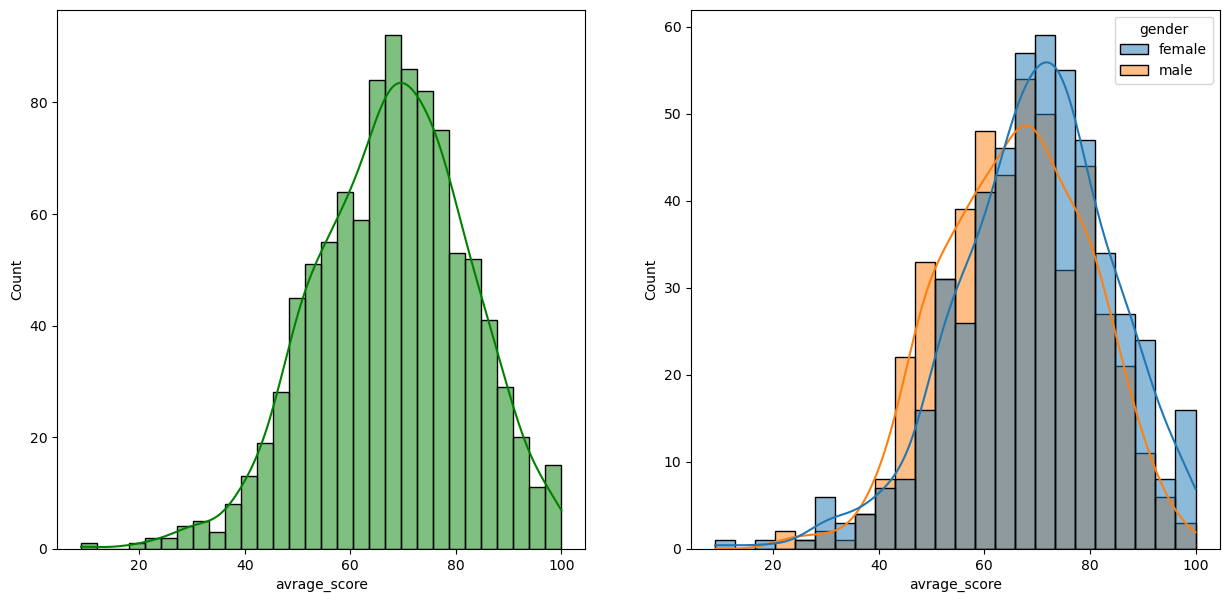

In [35]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x="avrage_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=data,x="avrage_score",kde=True,hue="gender")
plt.show()             

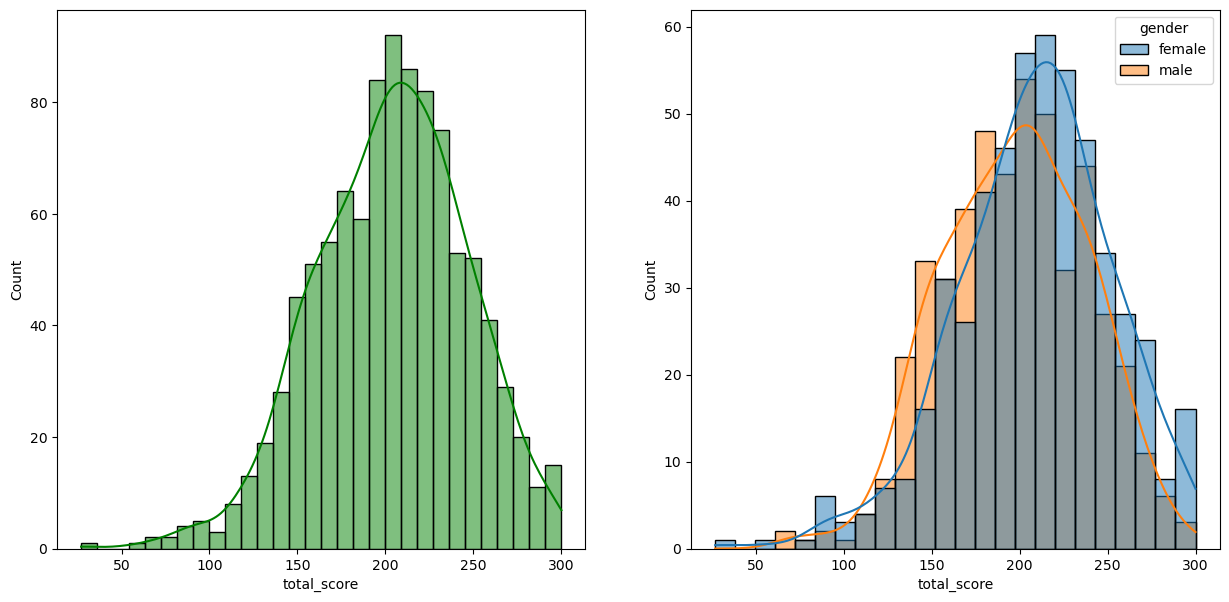

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

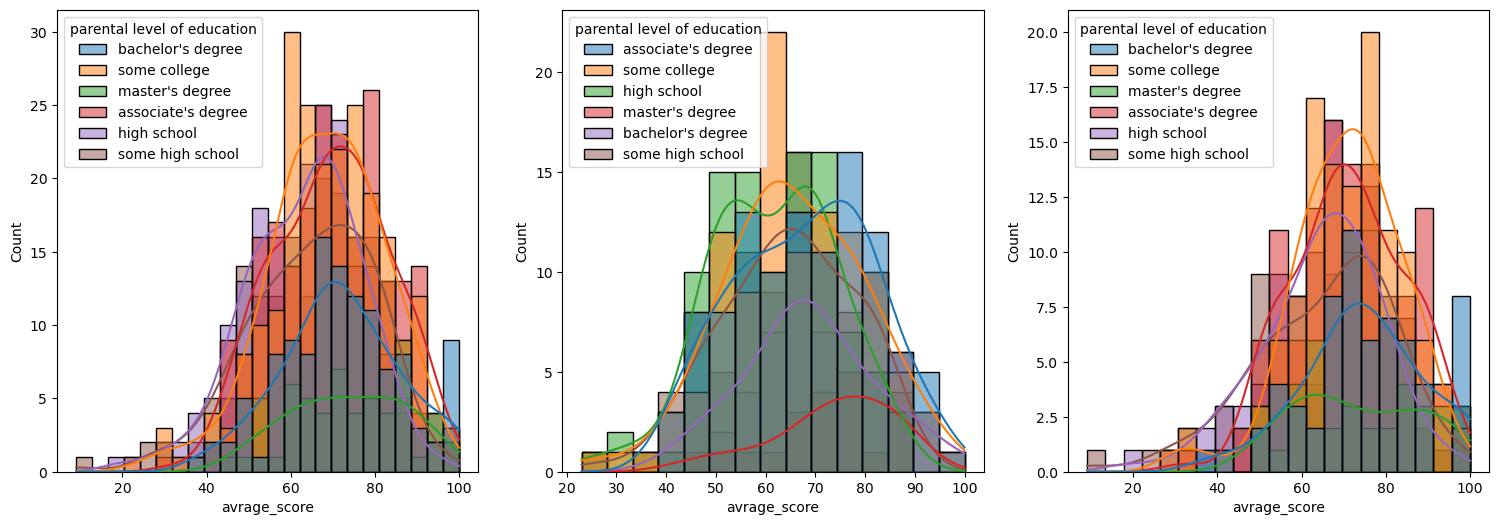

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='avrage_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='avrage_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='avrage_score',kde=True,hue='parental level of education')
plt.show()

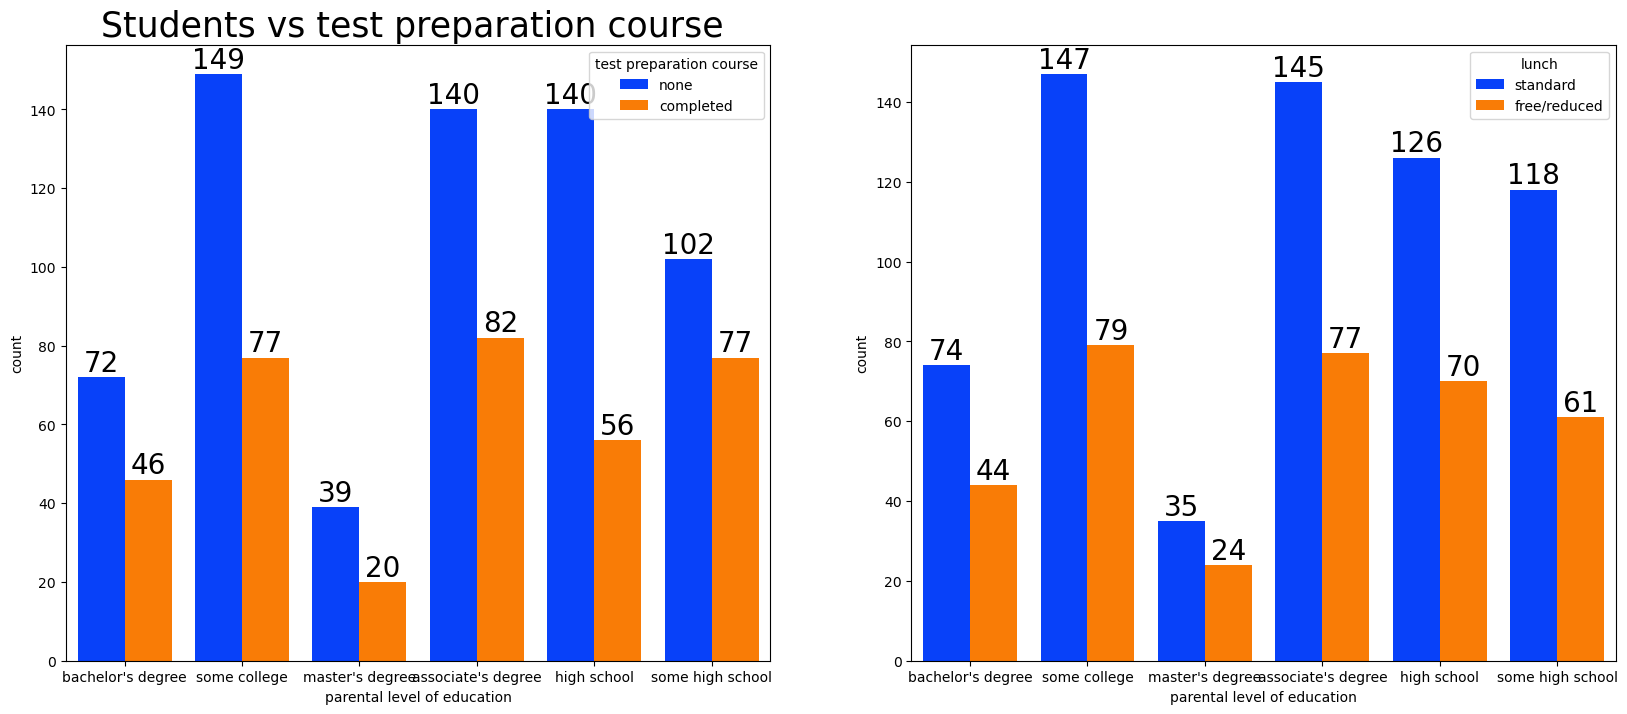

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

## checking outliers

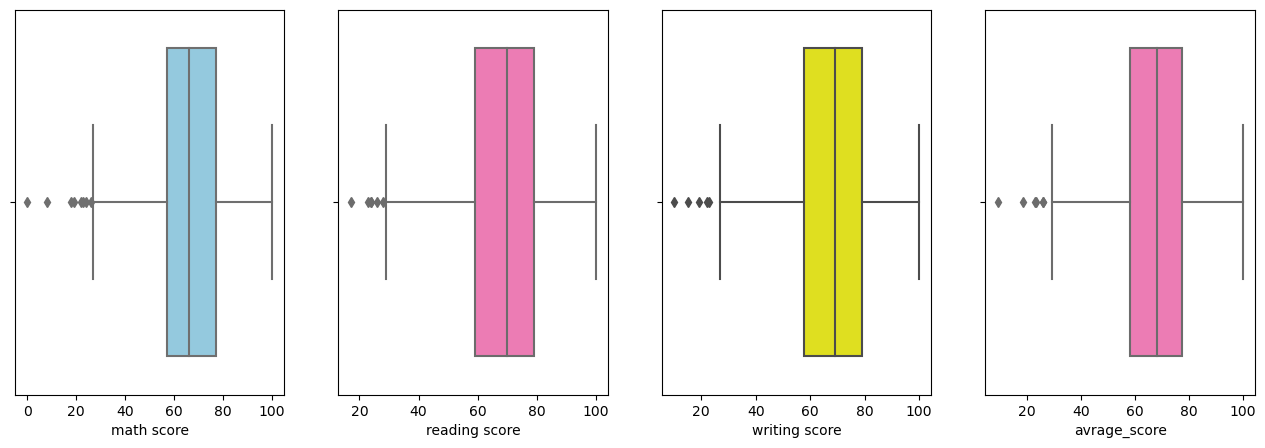

In [47]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['avrage_score'],color='hotpink')
plt.show()

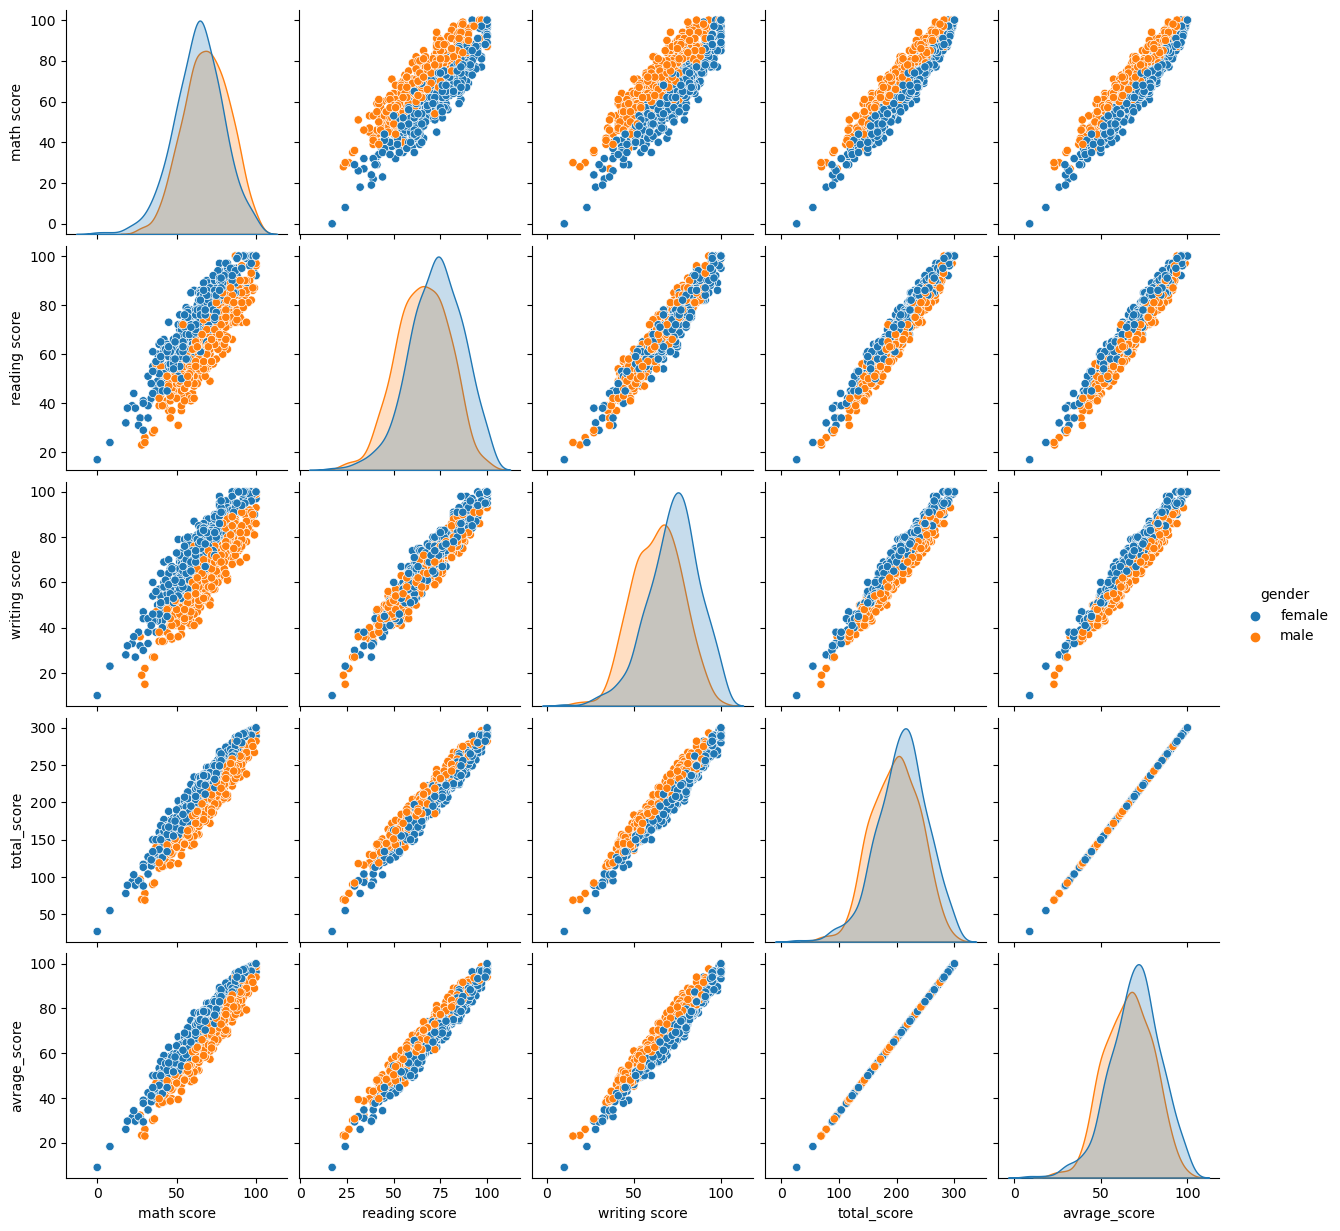

In [49]:
sns.pairplot(data,hue = 'gender')
plt.show()